In [3]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os.path

# Data Exploration

What type of data do we have? Real values /n
Shape of data: 1599 data points for red, 4898 data points for white, 11 features


In [4]:
# Data Loading
red_data = pd.read_csv('data/winequality-red.csv', delimiter=';')
white_data = pd.read_csv('data/winequality-white.csv', delimiter=';')

In [5]:
# Y values
#    1 - fixed acidity
#    2 - volatile acidity
#    3 - citric acid
#    4 - residual sugar
#    5 - chlorides
#    6 - free sulfur dioxide
#    7 - total sulfur dioxide
#    8 - density
#    9 - pH
#    10 - sulphates
#    11 - alcohol

# Feature Selection / Dimensionality Reduction
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

## Unsupervised Feature Selection

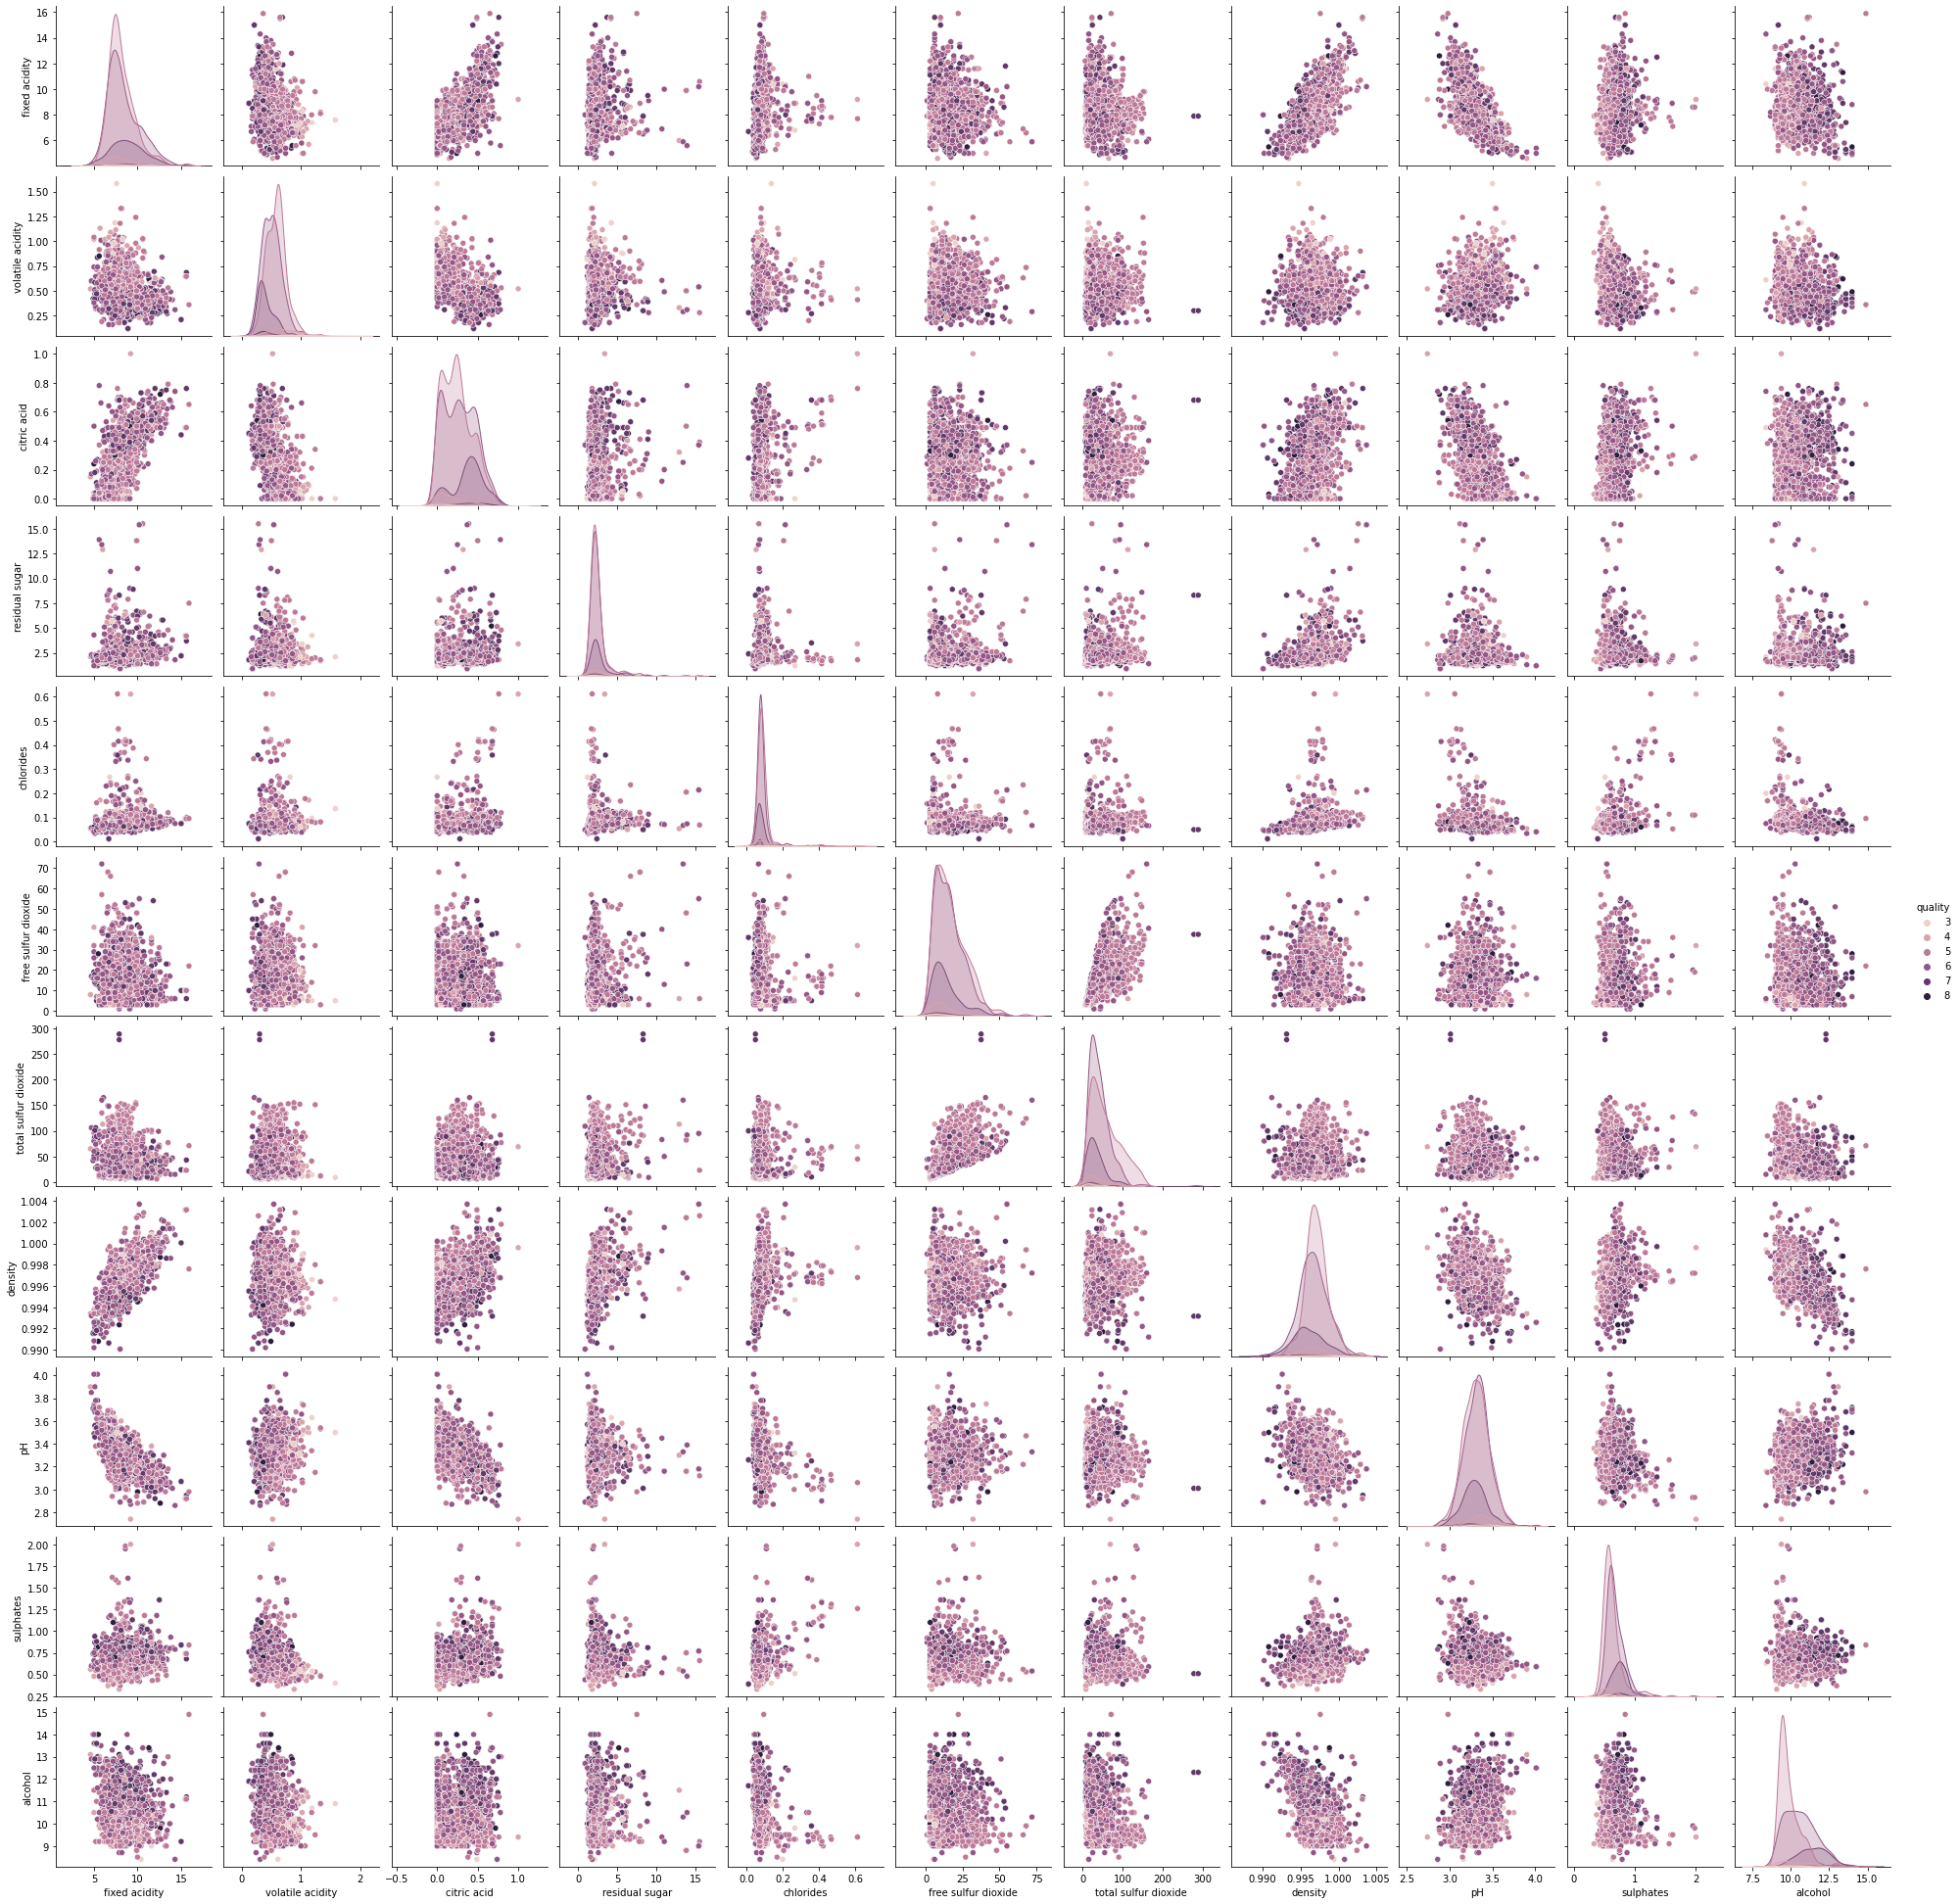

In [6]:
sns.pairplot(red_data, hue='quality')

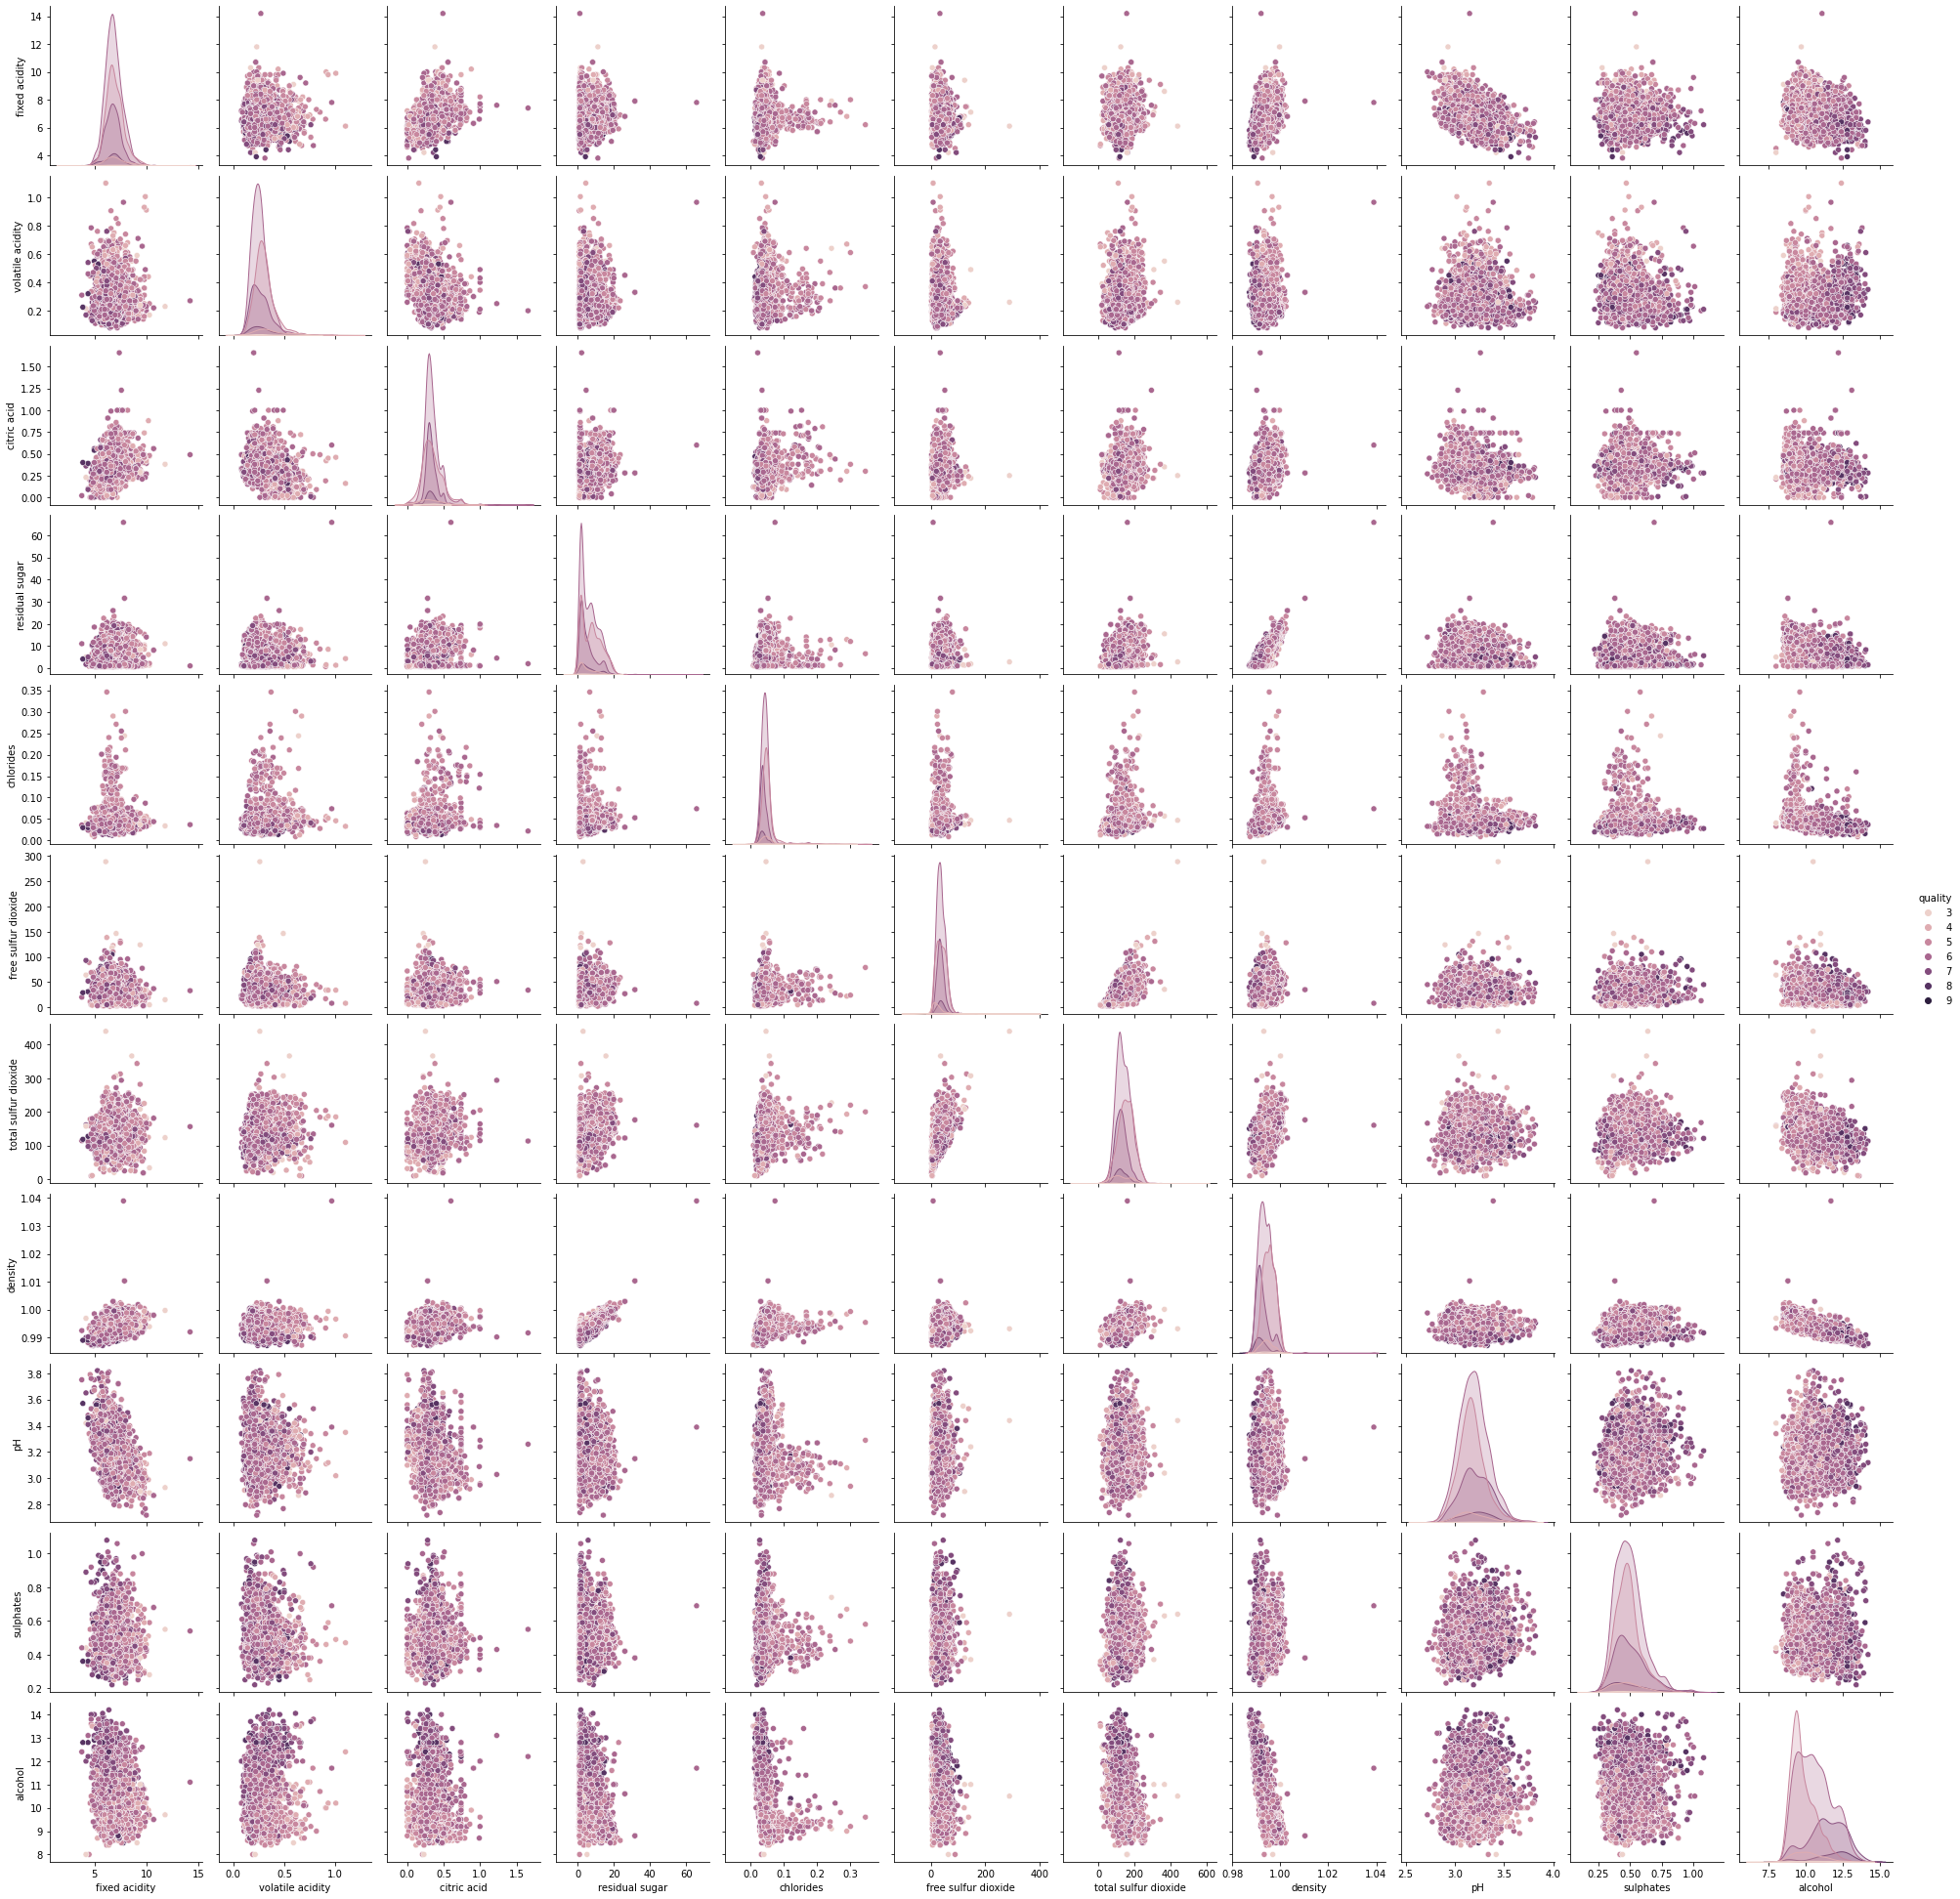

In [7]:
sns.pairplot(white_data, hue='quality')

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

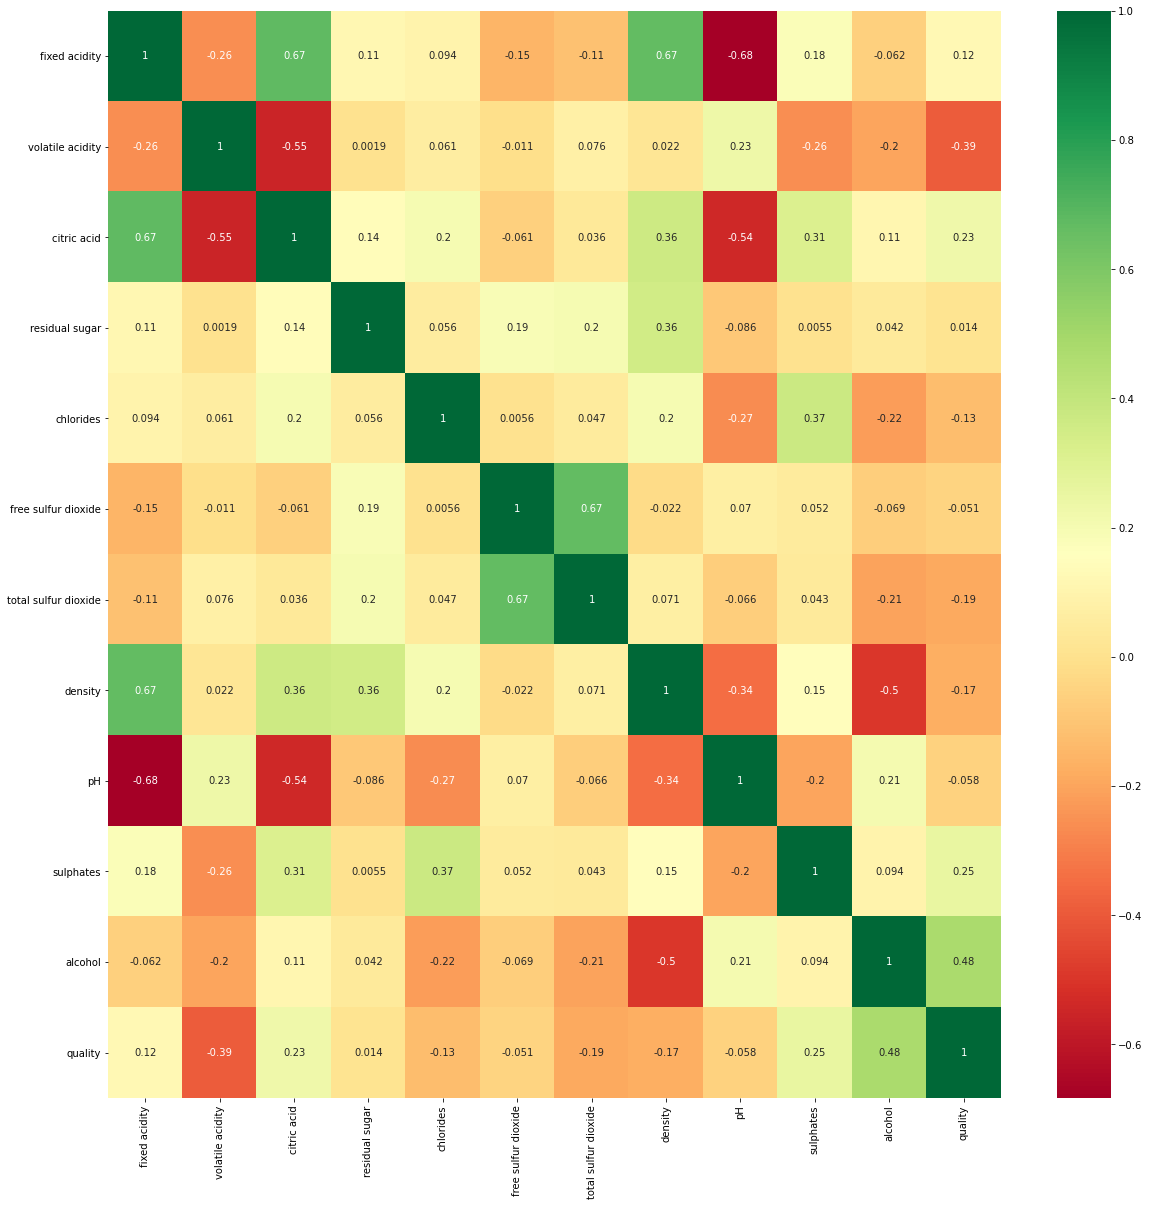

In [8]:
X_red = red_data.iloc[:, :-1]  #independent columns
y_red = red_data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
red_corrmat = red_data.corr()
top_red_corr_features = red_corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(red_data[top_red_corr_features].corr(),annot=True,cmap="RdYlGn")

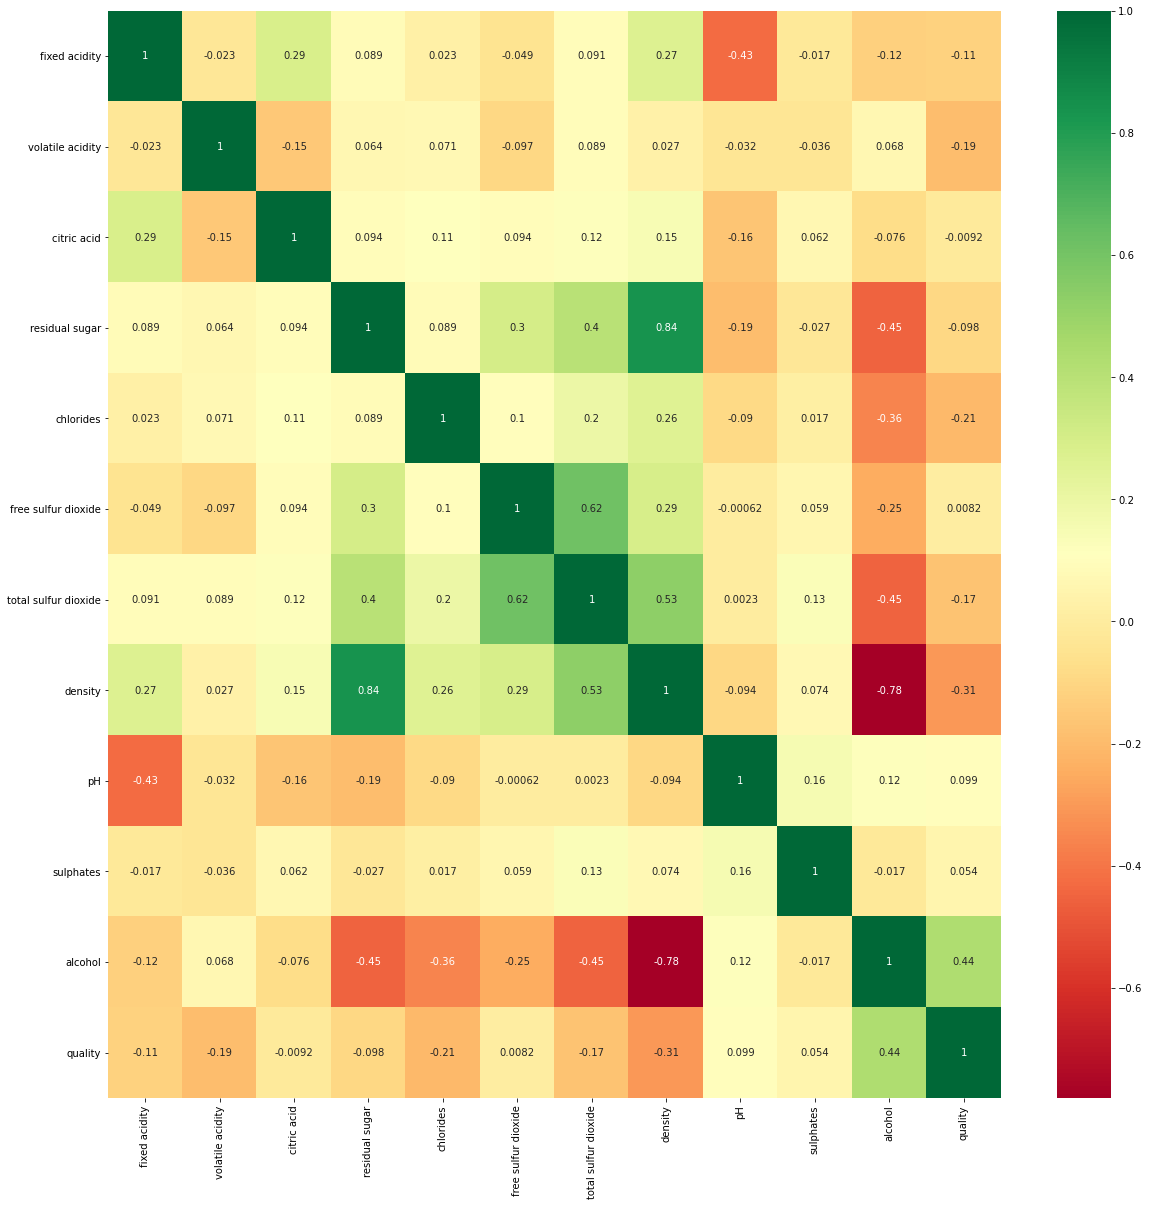

In [9]:
X_white = white_data.iloc[:, :-1]  #independent columns
y_white = white_data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
white_corrmat = white_data.corr()
top_white_corr_features = white_corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(white_data[top_white_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
# X_red, y_red, X_white, y_white

#getting the x and y data for both colors
X_red = red_data.iloc[:, :-1]  #independent columns
y_red = red_data.iloc[:,-1]    #target column i.e price range
X_white = white_data.iloc[:, :-1]  #independent columns
y_white = white_data.iloc[:,-1]    #target column i.e price range

#converting to np so i can actually use it
X_red = X_red.to_numpy()
y_red = y_red.to_numpy()
X_white = X_white.to_numpy()
y_white = y_white.to_numpy()

#splitting the data into test and train
Xtr_red,Xva_red,Ytr_red,Yva_red         = ml.splitData(X_red,y_red, 0.75);
Xtr_white,Xva_white,Ytr_white,Yva_white = ml.splitData(X_white,y_white, 0.75);

#variables for the for loops
num_nodes = [2, 4, 7, 10]
node_len = len(num_nodes)
num_layers = [2, 3, 4]
layer_len = len(num_layers)

In [11]:
import random

combined_data = np.concatenate((red_data, white_data))

is_red = np.array([0] * red_data.shape[0])
is_white = np.array([1] * white_data.shape[0])
combined_Y = np.concatenate((is_red, is_white))
combined_X = combined_data[:, :-1]
random.seed(0)
combined_X, combined_Y = ml.shuffleData(combined_X, combined_Y)

Xtr, Xva, Ytr, Yva = ml.splitData(combined_X, combined_Y)

In [12]:
node_counts = [2, 10, 20, 50]
layer_counts = [2, 4, 6]

tr_auc = np.zeros((len(node_counts), len(layer_counts)))
va_auc = np.zeros((len(node_counts), len(layer_counts)))

for i, node_count in enumerate(node_counts):
    for j, layer_count in enumerate(layer_counts):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([Xtr.shape[1]] + [node_count] * layer_count + [2], 'random', Xtr, Ytr)  # as many layers nodes you want
        nn.train(Xtr, Ytr, stopTol=1e-8, stepsize=.25, stopIter=500)

        tr_auc[i][j] = nn.auc(Xtr, Ytr)
        va_auc[i][j] = nn.auc(Xva, Yva)

it 1 : Jsur = 0.3891128504624915, J01 = 0.25452096960369375
it 2 : Jsur = 0.38378948450937844, J01 = 0.25452096960369375
it 4 : Jsur = 0.3807414793051451, J01 = 0.25452096960369375
it 8 : Jsur = 0.3797125298968428, J01 = 0.25452096960369375
it 16 : Jsur = 0.3795031718403932, J01 = 0.25452096960369375
it 32 : Jsur = 0.3794813145869278, J01 = 0.25452096960369375
it 1 : Jsur = 0.38911285181078054, J01 = 0.25452096960369375
it 2 : Jsur = 0.3837894847622485, J01 = 0.25452096960369375
it 4 : Jsur = 0.38074147882895515, J01 = 0.25452096960369375
it 8 : Jsur = 0.37971252967066804, J01 = 0.25452096960369375
it 16 : Jsur = 0.3795031717667974, J01 = 0.25452096960369375
it 32 : Jsur = 0.3794813145788665, J01 = 0.25452096960369375
it 1 : Jsur = 0.38911285367241105, J01 = 0.25452096960369375
it 2 : Jsur = 0.38378948484878694, J01 = 0.25452096960369375
it 4 : Jsur = 0.38074147882039716, J01 = 0.25452096960369375
it 8 : Jsur = 0.3797125296676838, J01 = 0.25452096960369375
it 16 : Jsur = 0.379503171766

In [13]:
# Now plot it
best_auc = va_auc.max()
indeces = np.where(va_auc == best_auc)
indeces = tuple([indeces[i][0] for i in range(len(indeces))])
best_node_count = node_counts[indeces[0]]
best_layer_count = layer_counts[indeces[1]]
print(f'best (node, layer) pairing is: ({best_node_count}, {best_layer_count})')

best (node, layer) pairing is: (50, 4)


<ipython-input-14-98bdcf34413b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([''] + layer_counts)
<ipython-input-14-98bdcf34413b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([''] + node_counts)
<ipython-input-14-98bdcf34413b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([''] + layer_counts)
<ipython-input-14-98bdcf34413b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([''] + node_counts)


Text(0, 0.5, 'Nodes')

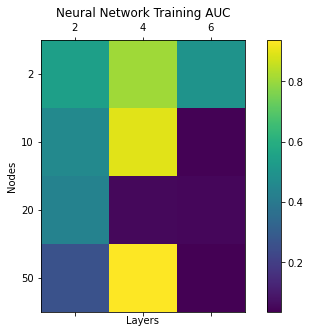

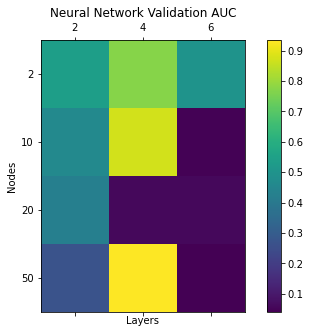

In [14]:
# Training AUC
f, axes = plt.subplots(1, 1, figsize=(8, 5))
plt.title('Neural Network Training AUC')
c_axes = axes.matshow(tr_auc, interpolation='nearest')
f.colorbar(c_axes)
axes.set_xticklabels([''] + layer_counts)
axes.set_xlabel('Layers')
axes.set_yticklabels([''] + node_counts)
axes.set_ylabel('Nodes')

# Validation AUC
f, axes = plt.subplots(1, 1, figsize=(8, 5))
plt.title('Neural Network Validation AUC')
c_axes = axes.matshow(va_auc, interpolation='nearest')
f.colorbar(c_axes)
axes.set_xticklabels([''] + layer_counts)
axes.set_xlabel('Layers')
axes.set_yticklabels([''] + node_counts)
axes.set_ylabel('Nodes')

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

trees = [10,100,1000, 2000]
acc_red = []
acc_white = []
best_red_acc = 0
best_forest_red = 0
best_white_acc = 0
best_forest_white = 0
# Instantiate model with 1000 decision trees
for tree in trees:
    rf = RandomForestRegressor(n_estimators = tree, random_state = 42)
    rf.fit(Xtr_red, Ytr_red)             # Train
    predictions = rf.predict(Xva_red)
    errors = abs(predictions - Yva_red)
    mape = 100 * (errors / Yva_red)      # Mean Absolute Percentage Error (MAPE)
    accuracy = 100 - np.mean(mape)
    if accuracy > best_red_acc:
        best_red_acc = accuracy
        best_forest_red = tree
        
    acc_red.append(accuracy) # Save for plotting
    
    rf = RandomForestRegressor(n_estimators = tree, random_state = 42)
    # Train the model on training data
    rf.fit(Xtr_white, Ytr_white);
    
    # Calculate Error
    predictions = rf.predict(Xva_white)
    errors = abs(predictions - Yva_white)
    mape = 100 * (errors / Yva_white)  # mean absolute percentage error
    accuracy = 100 - np.mean(mape)
    if accuracy > best_white_acc:
        best_white_acc = accuracy
        best_forest_white = tree
    
    acc_white.append(accuracy) # Save for plotting

In [16]:
print('Best Red Wine Forest:', best_forest_red)
print('Accuracy:', best_red_acc)

print('Best White Wine Forest:', best_forest_white)
print('Accuracy:', best_white_acc)

Best Red Wine Forest: 1000
Accuracy: 90.26039255952381
Best White Wine Forest: 1000
Accuracy: 90.32040810768751


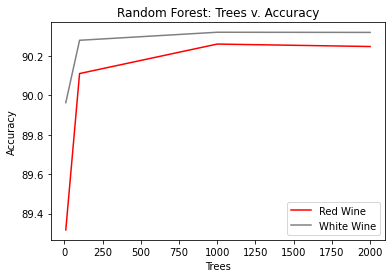

In [17]:
# Plot Red Wine Error vs Number of trees
plt.plot(trees, acc_red, label='Red Wine', color='red')

# Plot White Wine Error
plt.plot(trees, acc_white, label='White Wine', color='gray')
plt.title('Random Forest: Trees v. Accuracy')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.legend()